In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Norway_car_sales_2007.csv")
df

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


# DATASET

## Dataset is of Car sales in Norway country for year 2007. Answer the questions of stakeholders below:

## 1.Number of Car companies in the dataset?

In [20]:
unique_makes = df['Make'].unique()

# Print the unique make values
print("Unique makes: ", unique_makes)

Unique makes:  ['Toyota' 'Volkswagen' 'Peugeot' 'Ford' 'Volvo' 'Skoda' 'Opel' 'Audi'
 'Honda' 'Mercedes-Benz' 'BMW' 'Citroen' 'Suzuki' 'Mazda' 'Saab' 'Renault'
 'Mitsubishi' 'Nissan' 'Hyundai' 'Kia' 'Dodge' 'MINI' 'Subaru' 'Lexus'
 'Chevrolet' 'Alfa Romeo' 'Daihatsu' 'Land Rover' 'Fiat' 'Chrysler'
 'Iveco' 'Jaguar' 'Jeep' 'Nilsson' 'Think' 'Smart' 'Ssangyong' nan
 'Chevrolet US' 'Porsche' 'Cadillac' 'Aston Martin' 'Morgan' 'Bentley'
 'Lancia' 'Maserati' 'Isuzu' 'Ferrari' 'Koenigsegg' 'Lamborghini' 'Seat'
 'Tesla' 'Tata' 'Dacia' 'Infiniti' 'Lotus' 'Secma' 'Martin Motors'
 'Fisker' 'Westfield' 'Mia' 'McLaren' 'Binz' 'Tazzari' 'Polaris' 'DS']


In [5]:
num_unique_makes = df['Make'].nunique()

# Print the number of unique makes
print("Number of car companies in the dataset: ", num_unique_makes)


Number of car companies in the dataset:  65


In [38]:
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace month values with month names using the map() function
df['Month'] = df['Month'].map(month_mapping)

# Print the updated DataFrame
print(df)

      Year    Month        Make  Quantity   Pct
0     2007  January      Toyota      2884  22.7
1     2007  January  Volkswagen      2521  19.9
2     2007  January     Peugeot      1029   8.1
3     2007  January        Ford       870   6.9
4     2007  January       Volvo       693   5.5
...    ...      ...         ...       ...   ...
4372  2017  January     Nilsson         3   0.0
4373  2017  January    Maserati         2   0.0
4374  2017  January     Ferrari         1   0.0
4375  2017  January       Smart         1   0.0
4376  2017  January   Ssangyong         1   0.0

[4377 rows x 5 columns]


In [39]:
df

,Year,Month,Make,Quantity,Pct
0,2007,January,Toyota,2884,22.7
1,2007,January,Volkswagen,2521,19.9
2,2007,January,Peugeot,1029,8.1
3,2007,January,Ford,870,6.9
4,2007,January,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,January,Nilsson,3,0.0
4373,2017,January,Maserati,2,0.0
4374,2017,January,Ferrari,1,0.0
4375,2017,January,Smart,1,0.0


## 2.Number of Quantites of car sold in different months ?

In [52]:
monthly_sum_quantity = df.groupby('Month')['Quantity'].sum()
monthly_sum_quantity = monthly_sum_quantity.reset_index()

# Print the monthly sum of quantities
print(monthly_sum_quantity)

        Month  Quantity
0       April    113946
1      August    109194
2    December    109070
3    February    102684
4     January    116439
5        July    112113
6        June    111137
7       March    118439
8         May    114407
9    November    112615
10    October    115847
11  September    111359


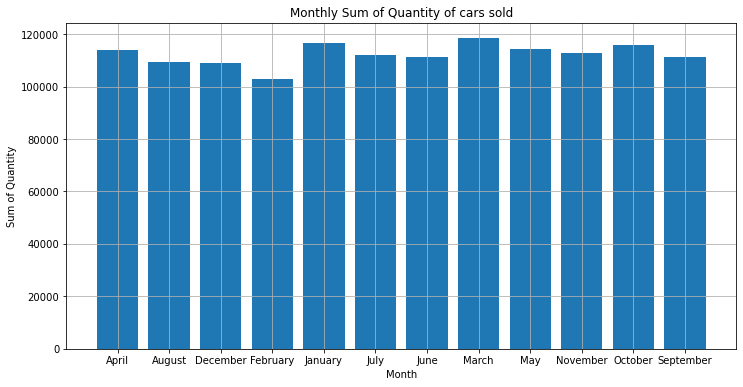

In [51]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(monthly_sum_quantity['Month'], monthly_sum_quantity['Quantity'])
plt.xlabel('Month')
plt.ylabel('Sum of Quantity')
plt.title('Monthly Sum of Quantity of cars sold')
plt.grid()
plt.show()

## 3.Number of car sold of different companies ?

In [7]:
make_sum_quantity = df.groupby('Make')['Quantity'].sum()

# Sort the make_sum_quantity Series in descending order
make_sum_quantity = make_sum_quantity.sort_values(ascending=False)

# Get the top ten make types with highest quantity values
top_make_types = make_sum_quantity.head(10)

# Print the top ten make types with highest quantity values
print("Top ten make types with highest quantity values:")
print(top_make_types)

Top ten make types with highest quantity values:
Make
Volkswagen       206669
Toyota           168177
Volvo             99937
Ford              99713
BMW               73315
Audi              70475
Skoda             66007
Nissan            64535
Peugeot           61033
Mercedes-Benz     57557
Name: Quantity, dtype: int64


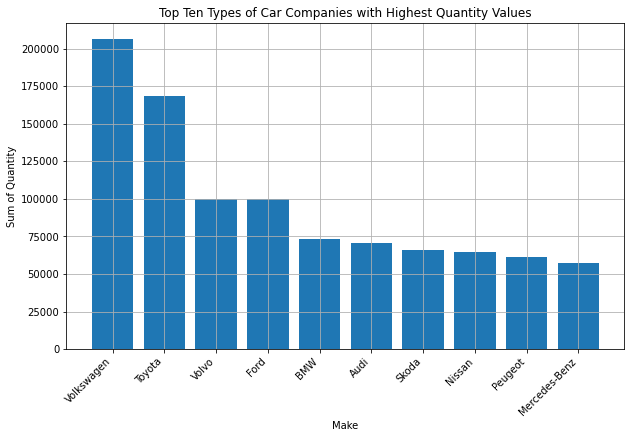

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(top_make_types.index, top_make_types.values)
plt.xlabel('Make')
plt.ylabel('Sum of Quantity')
plt.title('Top Ten Types of Car Companies with Highest Quantity Values')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

## 4.Car company with the highest market share ?

In [69]:
make_sum_quantity = df.groupby('Make')['Quantity'].sum()

# Calculate the total sum of quantities across all makes
total_sum_quantity = df['Quantity'].sum()

# Calculate the percentage share of quantity for each make by dividing the sum of quantities for each make
# by the total sum of quantities, and multiplying by 100 to convert to percentage
make_percentage_share = (make_sum_quantity / total_sum_quantity) * 100

# Find the make with the highest percentage share
make_highest_percentage_share = make_percentage_share.idxmax()

# Print the make with the highest percentage share
print("Company with the highest percentage share:")
print(make_highest_percentage_share)


Company with the highest percentage share:
Volkswagen


## 5. Total Quantity of cars sold ?

In [88]:
sum_of_make = df['Quantity'].sum()

# Print the sum of the 'make' column
print("Sum of quantity of car sold in whole year: ", sum_of_make)

Sum of quantity of car sold in whole year:  1347250


## 6. Car Sales Percentage share for different companies of whole year ?

In [84]:
make_quantity_sum = df.groupby('Make')['Quantity'].sum()

# Reset the index to convert the resulting GroupBy object to a DataFrame
make_quantity_sum = make_quantity_sum.reset_index()

print("Different Types of Makes and their Sum of Quantity:")
print(make_quantity_sum)

Different Types of Makes and their Sum of Quantity:
            Make  Quantity
0     Alfa Romeo      1881
1   Aston Martin        48
2           Audi     70475
3            BMW     73315
4        Bentley        13
..           ...       ...
60         Think       768
61        Toyota    168177
62    Volkswagen    206669
63         Volvo     99937
64     Westfield         1

[65 rows x 2 columns]


In [97]:
make_avg_pct_share = df.groupby('Make')['Pct'].mean()

print("Average Percentage Share of Different Make Values:")
print(make_avg_pct_share)

Average Percentage Share of Different Make Values:
Make
Alfa Romeo       0.138462
Aston Martin     0.000000
Audi             5.274380
BMW              5.323140
Bentley          0.000000
                  ...    
Think            0.142593
Toyota          12.621488
Volkswagen      15.276860
Volvo            7.380165
Westfield        0.000000
Name: Pct, Length: 65, dtype: float64


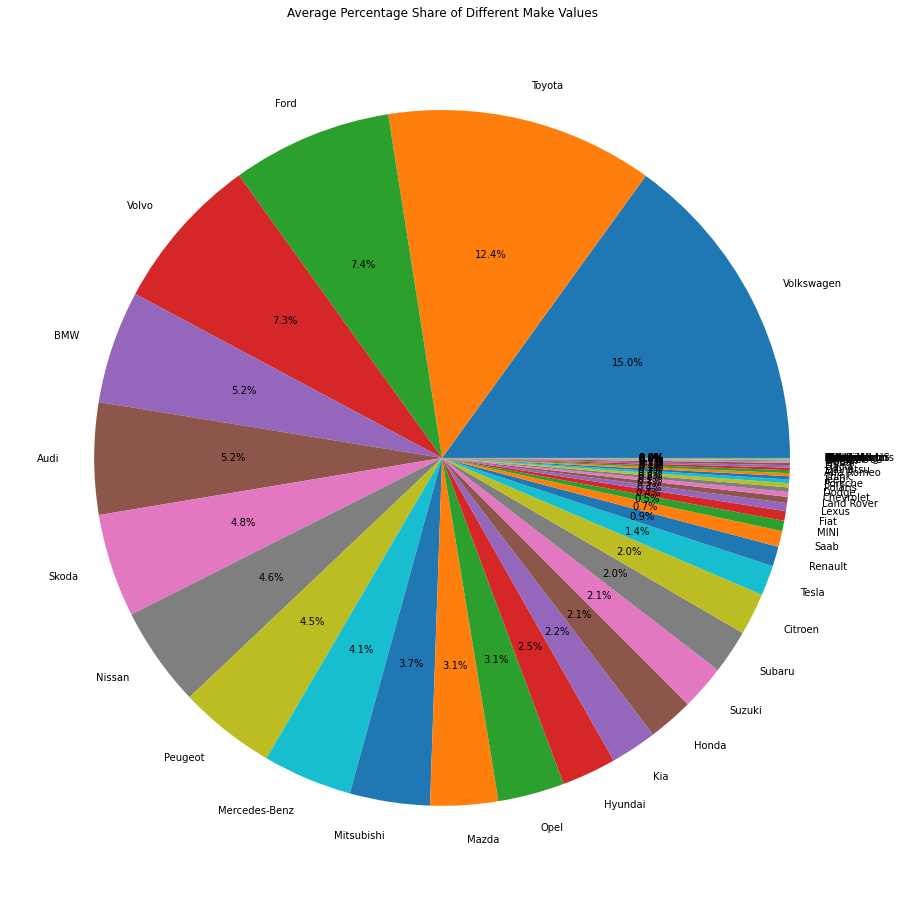

In [103]:
make_avg_pct_share = df.groupby('Make')['Pct'].mean()

# Convert the result to a DataFrame
make_avg_pct_share_df = pd.DataFrame({'Make': make_avg_pct_share.index, 'avg_pct_share': make_avg_pct_share.values})

# Sort the DataFrame by average percentage share in descending order
make_avg_pct_share_df = make_avg_pct_share_df.sort_values(by='avg_pct_share', ascending=False)

plt.figure(figsize=(16, 16))
plt.pie(make_avg_pct_share_df['avg_pct_share'], labels=make_avg_pct_share_df['Make'], autopct='%1.1f%%')
plt.title('Average Percentage Share of Different Make Values')
plt.show()

# PIVOT TABLE 

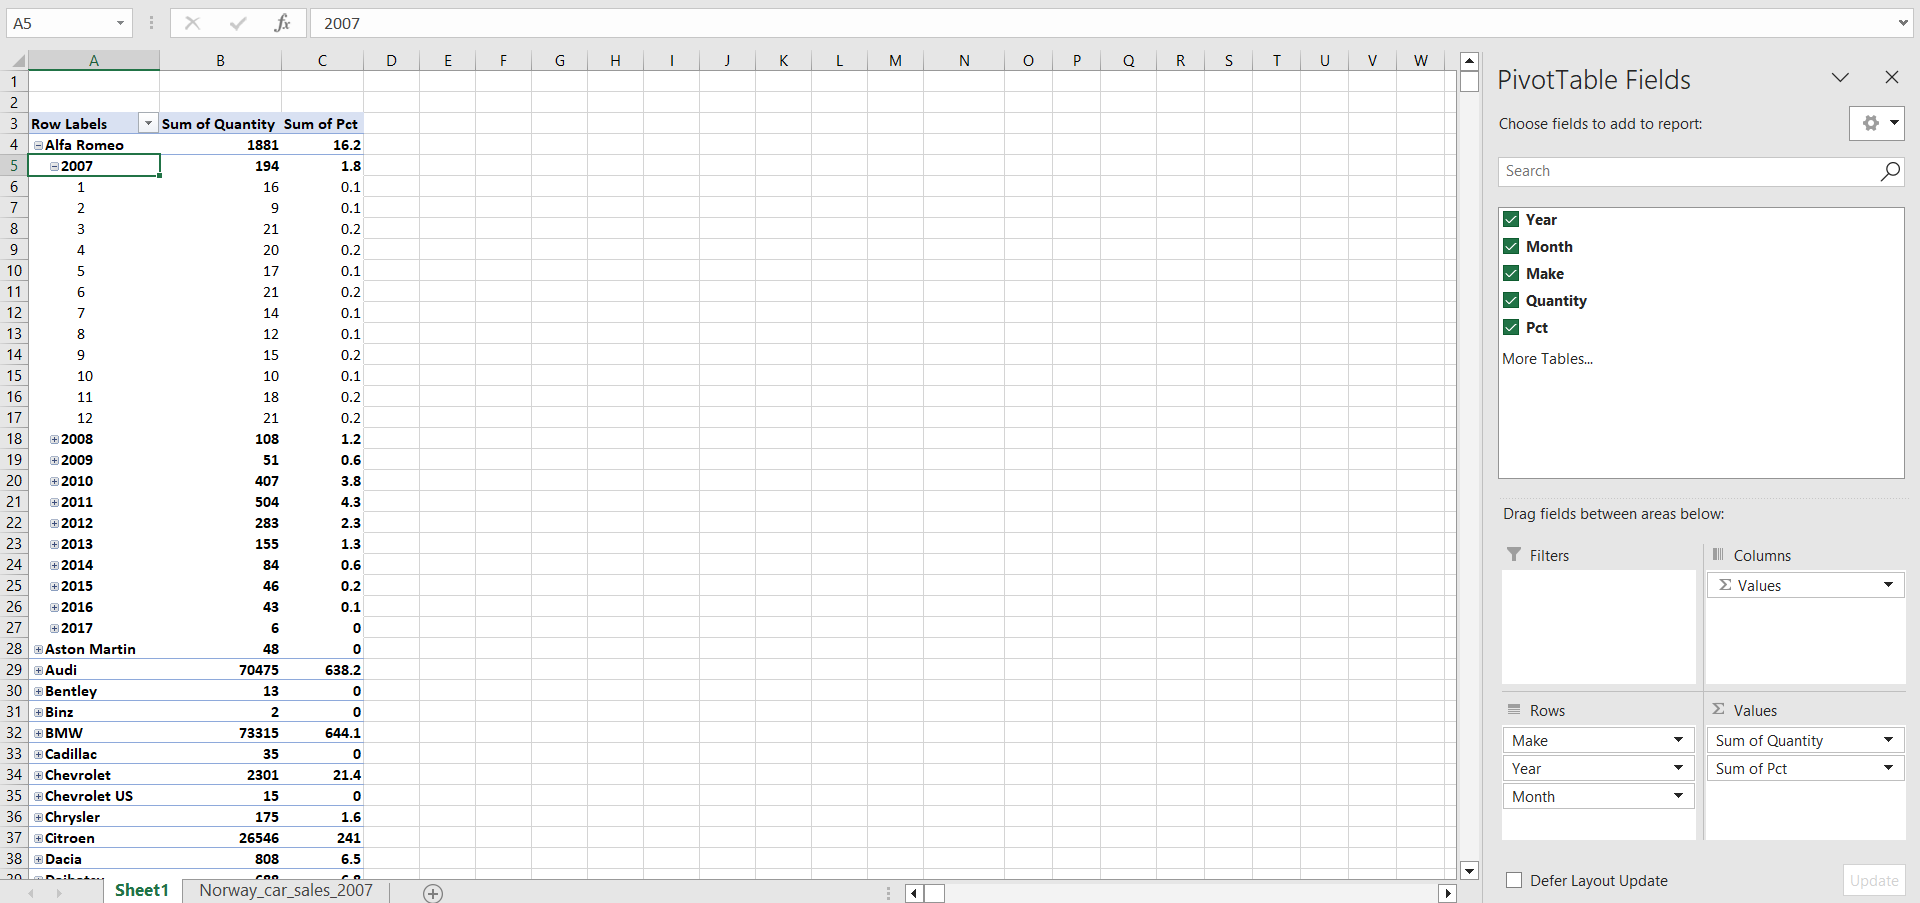

## IN Row Box I put "Make","Year" and "Month"
## In Values section I Put "Sum of Quantity" and "Sum of Pct (Percentage share)"
## IN columns Box I Put "Values"